<h1> Regression Modelling on Stock's Volatility </h1>


<p>The objective of this project is to use a simple linear regression model to determine a stock's beta. Beta is a measure of a stock's volatility in relation to the overall market. A beta greater than 1.0 means the stock is more volatile than the market, while a beta less than 1.0 means it is less volatile. </p>

In [1]:
# -==> finance_regression.py - Module 1: Setup and Data Fetching <==-
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -==> 1. SETUP AND DATA GATHERING <==-

# I'm going to start by picking a ticker and defining my market benchmark.
STOCK_TICKER = 'AAPL'
MARKET_TICKER = '^GSPC' # S&P 500 Index
START_DATE = '2020-01-01'
END_DATE = '2024-01-01'

print(f"-==> Starting Financial Regression Analysis for {STOCK_TICKER} <==-")
print(f"Fetching historical data from {START_DATE} to {END_DATE}...")

try:
    stock_df = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)
    market_df = yf.download(MARKET_TICKER, start=START_DATE, end=END_DATE)
    if stock_df.empty or market_df.empty:
        raise ValueError("Could not retrieve financial data from yfinance.")
    print("Data fetched successfully!")
    
except Exception as e:
    print(f"An error occurred while fetching data: {e}")
    exit()

-==> Starting Financial Regression Analysis for AAPL <==-
Fetching historical data from 2020-01-01 to 2024-01-01...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data fetched successfully!


In [2]:
# To see the columns in the stock and market dataframes:
print("--- Stock DataFrame Columns ---")
print(stock_df.columns.to_list())

print("\n--- Market DataFrame Columns ---")
print(market_df.columns.to_list())

--- Stock DataFrame Columns ---
[('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

--- Market DataFrame Columns ---
[('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]


The next step is to  access the 'Close' price, which for a simple model, is usually sufficient.

Here is the  code for Module 2: Data Preparation

In [3]:
# finance_regression.py - Module 2: Corrected Data Preparation

# -==> 2. DATA PREPARATION <==-

print("\n--- Preparing the data for regression ---")

# I'll calculate the daily returns from the 'Close' price, as that's what's available.
# The column names are MultiIndex, so I'll access them as a tuple.
stock_returns = stock_df[('Close', 'AAPL')].pct_change().dropna()
market_returns = market_df[('Close', '^GSPC')].pct_change().dropna()

# Now, I need to align the dataframes by date.This ensures that my stock return for a given day is matched with the market return for the same day.
combined_returns_df = pd.concat([stock_returns, market_returns], axis=1).dropna()
combined_returns_df.columns = ['Stock Returns', 'Market Returns']

print(f"Data prepared successfully! The dataset has {len(combined_returns_df)} daily observations.")


--- Preparing the data for regression ---
Data prepared successfully! The dataset has 1005 daily observations.


Module 3: Building the Regression Model 🤖

Now that my data is clean and prepared, I'm going to use scikit-learn to build a simple linear regression model. The model's job is to find a line that best fits the relationship between my stock's returns and the market's returns. The slope of that line will be the stock's beta.

In [4]:
# finance_regression.py - Module 3: Building the Regression Model

# --- 3. REGRESSION MODEL ---

print("\n--- Building the Linear Regression Model ---")

# My independent variable (X) is the market returns.
# My dependent variable (y) is the stock returns.
X = combined_returns_df['Market Returns'].values.reshape(-1, 1)
y = combined_returns_df['Stock Returns'].values

# I'll instantiate the linear regression model.
model = LinearRegression()

# Now, I'll train the model. This is the "learning" part.
model.fit(X, y)

# The model's coefficients are what I'm interested in.
# The intercept is the alpha, and the slope is the beta.
alpha = model.intercept_
beta = model.coef_[0]

print("Model trained successfully!")
print(f"Alpha (Model Intercept): {alpha:,.4f}")
print(f"Beta (Model Coefficient): {beta:,.4f}")


--- Building the Linear Regression Model ---
Model trained successfully!
Alpha (Model Intercept): 0.0006
Beta (Model Coefficient): 1.1897


Module 4: Analysis and Conclusion 📈

In this final step, I'll interpret the results and use a plot to visualize my findings.
 The beta value is the key here, as it tells me how volatile the stock is compared to the overall market.


--- Analyzing the Results ---


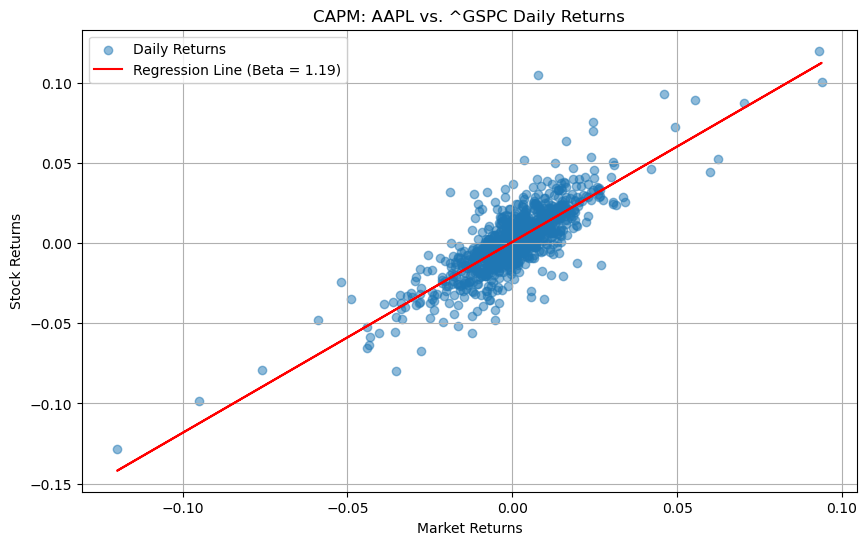


--- Final Conclusion ---
Based on my regression model, the beta for AAPL is approximately 1.19.
This indicates that AAPL is more volatile than the market.
When the market moves up or down by 1%, {STOCK_TICKER} is expected to move by more than 1%.


In [5]:
# finance_regression.py - Module 4: Analysis and Conclusion

# --- 4. ANALYSIS AND CONCLUSION ---

print("\n--- Analyzing the Results ---")

# I'll create a scatter plot of the returns data.
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Daily Returns')

# I'll plot the regression line from my model.
# The line is defined by y = alpha + beta*X.
regression_line = alpha + beta * X
plt.plot(X, regression_line, color='red', label=f'Regression Line (Beta = {beta:.2f})')

plt.title(f'CAPM: {STOCK_TICKER} vs. {MARKET_TICKER} Daily Returns')
plt.xlabel('Market Returns')
plt.ylabel('Stock Returns')
plt.legend()
plt.grid(True)
plt.show()

# --- CONCLUSION ---
print("\n--- Final Conclusion ---")
print(f"Based on my regression model, the beta for {STOCK_TICKER} is approximately {beta:,.2f}.")
if beta > 1:
    print(f"This indicates that {STOCK_TICKER} is more volatile than the market.")
    print("When the market moves up or down by 1%, {STOCK_TICKER} is expected to move by more than 1%.")
elif beta < 1:
    print(f"This indicates that {STOCK_TICKER} is less volatile than the market.")
    print("When the market moves up or down by 1%, {STOCK_TICKER} is expected to move by less than 1%.")
else:
    print(f"This indicates that {STOCK_TICKER} has similar volatility to the market.")